In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

In [2]:
disney_df = pd.read_csv("../CSV Resources/disney.csv")
disney_df = disney_df.set_index('Title')
disney_df.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
Lab Rats,2012,7+,6.6,NaN
America's Funniest Home Videos,1989,7+,6.2,NaN
Brain Games,2011,7+,8.3,NaN
Jessie,2011,all,5.9,NaN
PJ Masks,2015,all,5.6,NaN


In [3]:
imdb_average = disney_df['IMDB'].mean()
imdb_average

6.923668639053257

In [4]:
disney_df_dropped = disney_df.dropna()
disney_df_dropped.head()

,Year,Age,IMDB,Rotten Tomatoes
Title,,,,
The Simpsons,1989,7+,8.7,85%
Gravity Falls,2012,7+,8.9,100%
Marvel's Runaways,2017,16+,7.0,87%
The Mandalorian,2019,7+,8.7,93%
Star Wars: The Clone Wars,2008,7+,8.2,93%


In [5]:
disney_df_dropped['RT'] = disney_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)
disney_df_dropped.head()

<ipython-input-5-82baae958f03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_df_dropped['RT'] = disney_df_dropped['Rotten Tomatoes'].str.extract('(\d+)').astype(int)


,Year,Age,IMDB,Rotten Tomatoes,RT
Title,,,,,
The Simpsons,1989,7+,8.7,85%,85
Gravity Falls,2012,7+,8.9,100%,100
Marvel's Runaways,2017,16+,7.0,87%,87
The Mandalorian,2019,7+,8.7,93%,93
Star Wars: The Clone Wars,2008,7+,8.2,93%,93


In [6]:
rotten_average = disney_df_dropped['RT'].mean()
age_group = disney_df['Age'].mode()
total_shows = len(disney_df)
title = disney_df.index.to_list()

In [7]:
disney_df.sort_values(by=['IMDB'], inplace=True, ascending=False)
highest_rated_imdb = disney_df.index[0]

In [8]:
disney_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)
disney_df_dropped.head(100)
highest_rated_rt = disney_df_dropped.index[0]
highest_rated_rt

<ipython-input-8-bd35795a0d6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_df_dropped.sort_values(by=['RT', 'IMDB'], inplace=True, ascending=False)


'The Imagineering Story'

In [9]:
disney = pd.DataFrame({'Total Number of Shows': total_shows,
                        'Most Popular Age Group': age_group,
                        'Highest Rated IMDB': highest_rated_imdb,
                        'IMDB Average': imdb_average,
                        'Highest Rated RT': highest_rated_rt,
                        'Rotten Tomatoes': rotten_average})
disney

,Total Number of Shows,Most Popular Age Group,Highest Rated IMDB,IMDB Average,Highest Rated RT,Rotten Tomatoes
0,180,all,The Imagineering Story,6.923669,The Imagineering Story,81.173913


In [10]:
disney_df = disney_df.reset_index()
bins = [1900, 1949, 1979, 1989, 1999, 2009, 2020]
groups = ['1900-1949', '1950-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
pd.cut(disney_df['Year'], bins, labels=groups)

0      2010-2020
1      2010-2020
2      2010-2020
3      1980-1989
4      2010-2020
         ...    
175    2010-2020
176    2010-2020
177    2010-2020
178    2010-2020
179    2010-2020
Name: Year, Length: 180, dtype: category
Categories (6, object): [1900-1949 < 1950-1979 < 1980-1989 < 1990-1999 < 2000-2009 < 2010-2020]

In [11]:
disney_df['Age Range'] = pd.cut(disney_df['Year'], bins, labels=groups)
disney_df.head()

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,The Imagineering Story,2019,7+,9.1,100%,2010-2020
1,Gravity Falls,2012,7+,8.9,100%,2010-2020
2,One Strange Rock,2018,all,8.8,83%,2010-2020
3,The Simpsons,1989,7+,8.7,85%,1980-1989
4,The Mandalorian,2019,7+,8.7,93%,2010-2020


In [12]:
age_range_df = disney_df.groupby("Age Range")
age_range_df.head(50)

,Title,Year,Age,IMDB,Rotten Tomatoes,Age Range
0,The Imagineering Story,2019,7+,9.1,100%,2010-2020
1,Gravity Falls,2012,7+,8.9,100%,2010-2020
2,One Strange Rock,2018,all,8.8,83%,2010-2020
3,The Simpsons,1989,7+,8.7,85%,1980-1989
4,The Mandalorian,2019,7+,8.7,93%,2010-2020
...,...,...,...,...,...,...
147,Spider-Woman,1979,all,5.7,NaN,1950-1979
150,Handy Manny,2006,all,5.5,NaN,2000-2009
152,The Avengers: United They Stand,1999,7+,5.5,NaN,1990-1999
160,Hannah Montana,2006,all,5.0,NaN,2000-2009


In [13]:
ranges = age_range_df["Age Range"].count()
ranges

Age Range
1900-1949      0
1950-1979      2
1980-1989      7
1990-1999     22
2000-2009     30
2010-2020    119
Name: Age Range, dtype: int64

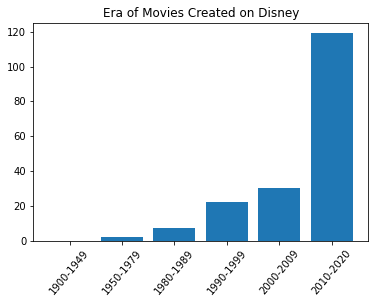

In [14]:
plt.bar(groups, ranges);
plt.title('Era of Movies Created on Disney');
plt.xticks(rotation=50);

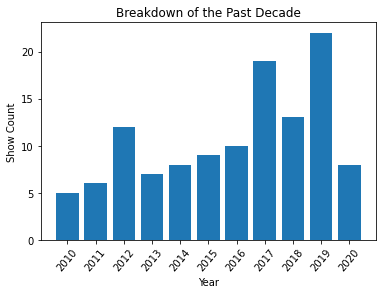

In [15]:
disney_years = disney_df.groupby("Year")
disney_year_count = disney_years.count().tail(11)
top_11_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
plt.bar(top_11_years,disney_year_count['Title'])
plt.title('Breakdown of the Past Decade')
plt.xlabel('Year')
plt.ylabel('Show Count')
plt.xticks(rotation=50);

169

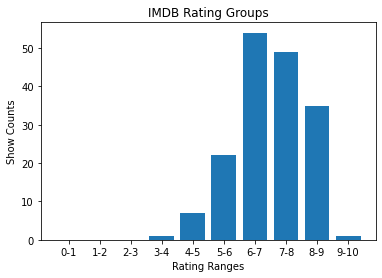

In [16]:
# IMDB Rating Groups using bins
bins2 = [0, .99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 10]
groups2 = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']
# ranges2['Title']
disney_df['IMDB Rating Ranges'] = pd.cut(disney_df['IMDB'], bins2, labels=groups2)
imdb_rating_ranges = disney_df.groupby('IMDB Rating Ranges')
ranges2 = imdb_rating_ranges['IMDB Rating Ranges'].count()
plt.bar(groups2, ranges2);
plt.title('IMDB Rating Groups')
plt.xlabel('Rating Ranges')
plt.ylabel('Show Counts')
ranges2.sum()

23

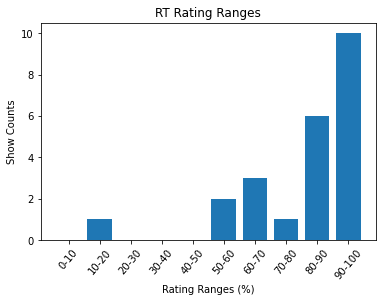

In [17]:
# Rotten Tomatoes Rating Groups using bins
bins3 = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groups3 = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
disney_df_dropped['RT Rating Ranges'] = pd.cut(disney_df_dropped['RT'], bins3, labels=groups3)
rt_rating_ranges = disney_df_dropped.groupby('RT Rating Ranges')
ranges3 = rt_rating_ranges['RT Rating Ranges'].count()
plt.bar(groups3, ranges3);
plt.title('RT Rating Ranges')
plt.xlabel('Rating Ranges (%)')
plt.ylabel('Show Counts')
plt.xticks(rotation=50);
ranges3.sum()

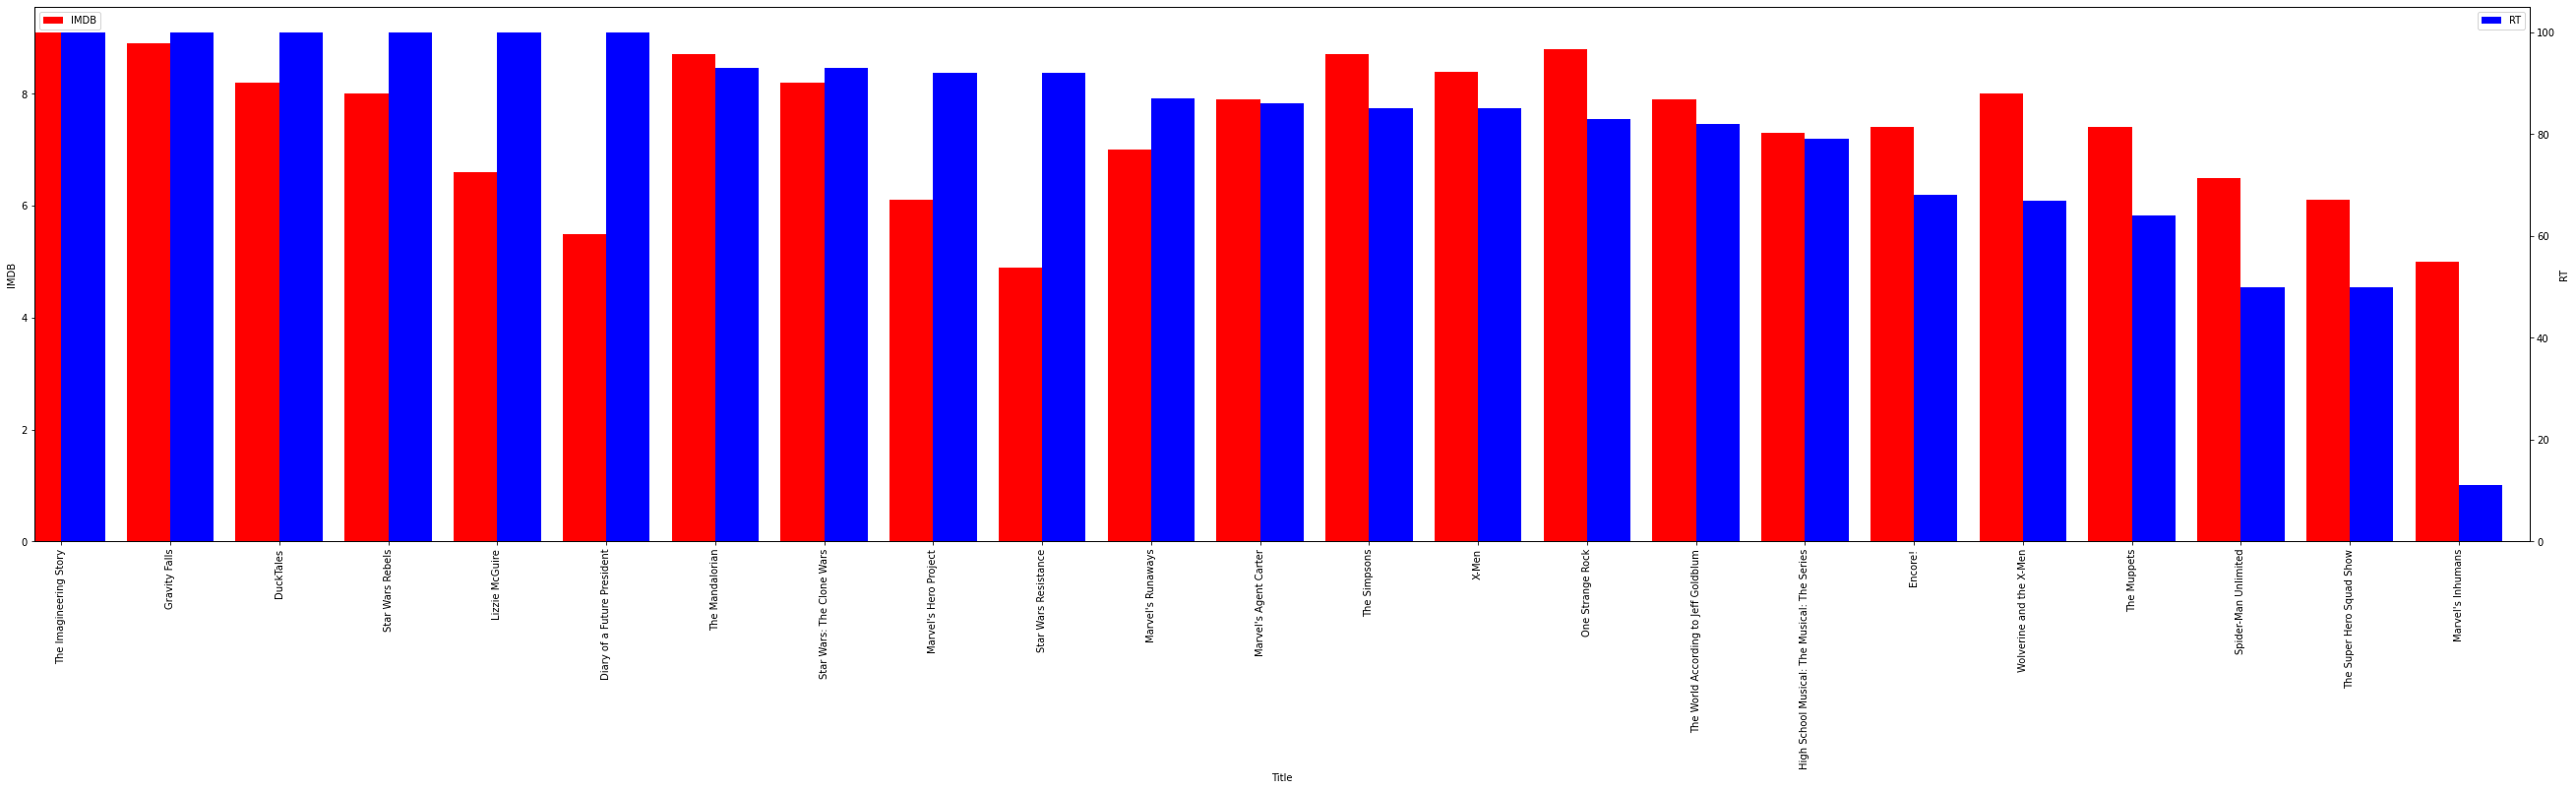

In [18]:
# Compares each show's IMDB and Rotten Tomatoes' rating
fig = plt.figure(figsize=(100,10)) # Create matplotlib figure
ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4
disney_df_dropped.IMDB.plot(kind='bar', color='red', legend = 'IMDB', ax=ax, width=width, position=1);
disney_df_dropped.RT.plot(kind='bar', color='blue', legend = 'Rotten Tomatoes', ax=ax2, width=width, position=0);
ax.set_ylabel('IMDB');
ax.legend(loc = "upper left")
ax2.set_ylabel('RT');
ax2.legend(loc = 'upper right')

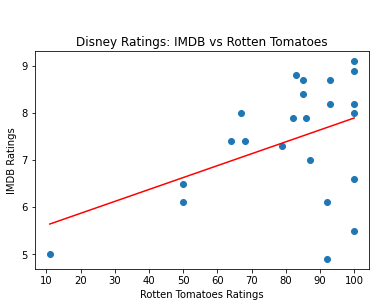

The correlation between both factors is 0.44


In [19]:
# Netflix Ratings Comparisons for shows with both ratings
disney_RT = disney_df_dropped['RT']
disney_IMBD_ratings = disney_df_dropped['IMDB']



x_values = disney_RT
y_values = disney_IMBD_ratings
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.annotate(line_eq ,(6,10),fontsize=15,color="green")



plt.scatter(disney_RT, disney_IMBD_ratings)
plt.plot(x_values,regress_values,"r-")
plt.title('Disney Ratings: IMDB vs Rotten Tomatoes')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('Rotten Tomatoes Ratings')
plt.ylabel('IMDB Ratings')
plt.xlim = (0,100)
plt.show()

correlation = st.pearsonr(disney_RT,disney_IMBD_ratings)
print(f"The correlation between both factors is {round(correlation[0],2)}")

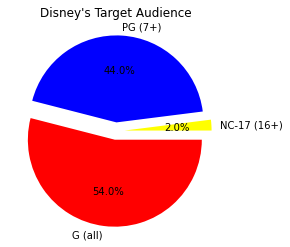

In [20]:
# Disney Target Audience pie chart
disney_age_group = disney_df.groupby("Age")
age_count = disney_age_group.count()
explode = (0.1,0.1,0.1)
labels = ['NC-17 (16+)','PG (7+)','G (all)']

plt.pie(age_count['Title'],explode = explode, labels = labels, colors = ['yellow','blue','red','green','orange'],autopct="%1.1f%%");
plt.title("Disney's Target Audience");